In [6]:
import numpy as np
from scipy.spatial.distance import euclidean

# Clustering

### 📌 Ejemplo 1: Cálculo de distancia euclidiana entre dos puntos

In [ ]:
# Dos puntos en 2D
p1 = np.array([2, 3])
p2 = np.array([7, 9])

In [ ]:
# Cálculo manual
# dist_manual = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
dist_manual = np.sqrt(np.sum((p1 - p2) ** 2))

In [ ]:
# Cálculo con SciPy
dist_scipy = euclidean(p1, p2)

In [8]:
print("Distancia Euclidiana (manual):", dist_manual)
print("Distancia Euclidiana (SciPy):", dist_scipy)

Distancia Euclidiana (manual): 7.810249675906654
Distancia Euclidiana (SciPy): 7.810249675906654


### 📌 Ejemplo 2: Cómo afecta la escala de las variables al clustering

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# Datos con diferente escala: edad (años) e ingreso mensual (en miles)
X = np.array([
    [25, 1],
    [27, 1.1],
    [29, 1.3],
    [60, 15],
    [62, 16],
    [65, 18]
])

In [12]:
# Sin escalar
kmeans_raw = KMeans(n_clusters=2, random_state=42).fit(X)
labels_raw = kmeans_raw.labels_

In [13]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels_scaled = kmeans_scaled.labels_

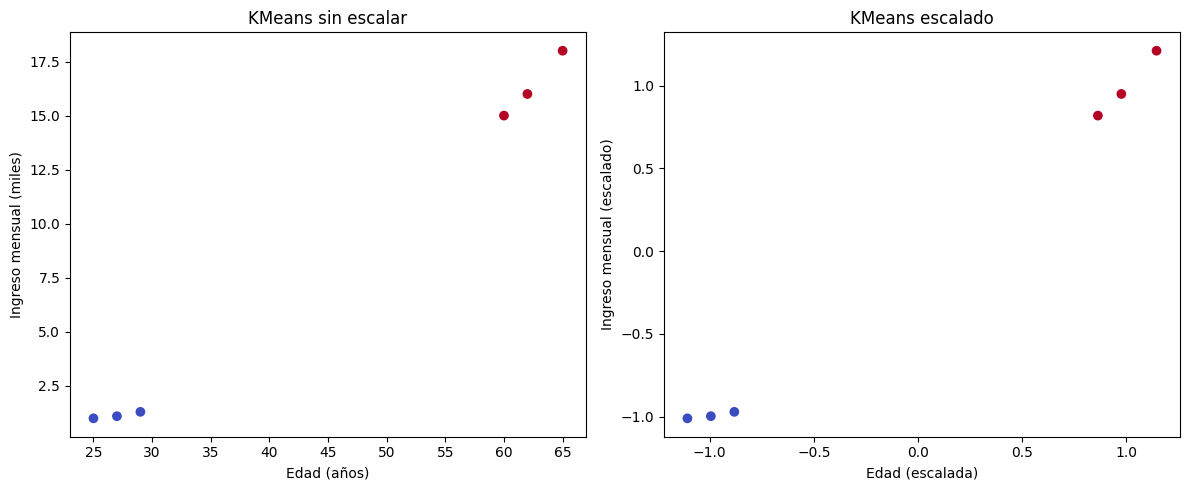

In [18]:
# Visualización
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=labels_raw, cmap='coolwarm')
ax[0].set_title('KMeans sin escalar')
ax[0].set_xlabel('Edad (años)')
ax[0].set_ylabel('Ingreso mensual (miles)')

ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, cmap='coolwarm')
ax[1].set_title('KMeans escalado')
ax[1].set_xlabel('Edad (escalada)')
ax[1].set_ylabel('Ingreso mensual (escalado)')

plt.tight_layout()
plt.show()

🔍 Explicación:

- Sin escalar, el modelo dará más peso al ingreso por su magnitud.

- Con StandardScaler, ambas variables tienen igual influencia.

🧠 Nota adicional dada en clase:

    “Siempre que usemos algoritmos de clustering que dependen de distancias, es obligatorio estandarizar las variables si no están en la misma escala, porque si no lo haces, el modelo tomará decisiones erróneas basadas en magnitudes, no en patrones.”

## Casos de uso de clustering

dataset: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset/data

In [28]:
import pandas as pd

dataset = pd.read_csv('../data/raw/twitter_sentiment_data.csv')

### Data dictionary

In [29]:
dataset.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [31]:
dataset.sentiment.value_counts()

sentiment
 1    22962
 2     9276
 0     7715
-1     3990
Name: count, dtype: int64

### Preprocesamiento del texto

In [35]:
tweets = [x for x in dataset["message"]][:1000]  # Tomamos 1000 para ejemplo rápido

In [37]:
%pip install nltk

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", tweet)  # eliminar URLs, menciones, hashtags
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)               # eliminar puntuación
    tokens = tweet.split()
    return " ".join([word for word in tokens if word not in stop_words])

tweets_cleaned = [clean_tweet(t) for t in tweets]

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to /home/edyn/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Vectorización con TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(tweets_cleaned)

### Clustering con K-Means

In [39]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

### Visualización con PCA

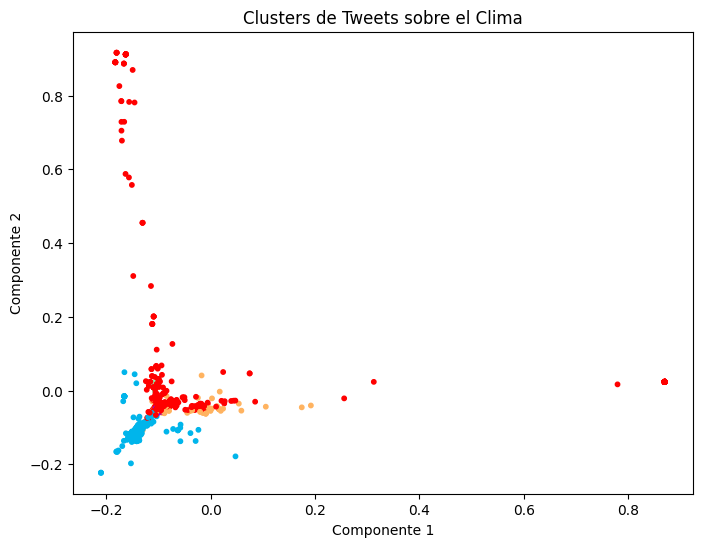

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2).fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap="rainbow", s=10)
plt.title("Clusters de Tweets sobre el Clima")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


### Interpretación de Clusters (opcional)

In [41]:
import pandas as pd

df = pd.DataFrame({"tweet": tweets_cleaned, "cluster": labels})
for i in range(n_clusters):
    print(f"\n🧩 Cluster {i}:\n")
    print(df[df["cluster"] == i]["tweet"].sample(5).to_list())



🧩 Cluster 0:

['rt polar vortex shifting due climate change extending winter', 'rt polar vortex shifting due climate change extending winter study finds marco say climate chan', 'rt polar vortex shifting due climate change extending winter study finds', 'rt indigenous rights key preserving forests climate change study finds', 'indigenous rights key preserving forests climate change study finds']

🧩 Cluster 1:

['happy november high temperature still global warming real natural progression time means nothing', 'rt trump calls global warming chinese hoax clinton emails', 'voted yes voted crooked nasty evil one mostly believes global climate change real', 'trump doesnt believe global warming china even telling hes wrong', 'rt trump calls global warming chinese hoax clinton emails']

🧩 Cluster 2:

['rt vows cancel billions climate change funds un adds im environmentalist', 'im creating new think tank climate change would join post tweet also', 'rt im glad asked email mentions cable news s